In [1]:
### Data is from UCI repo

In [2]:
### Here we detect the outliers which are the fraud customers

In [4]:
## We need to compute the MID(Mean Inter-Neuron Distance), which is the mean euclidean distance of the main neuron with its neighbourhood

In [5]:
### Outliers will be far from the mean

In [6]:
### Class 1 are the customers whose applications got approved
### They may be fraudulent

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [11]:
### x and y are the dimensions of the SOM(it should not be small so that outliers can be detected)
### input_len are the number of features of X(customer id included to find the id of faulters)
### sigma is the radius

In [12]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [13]:
### The higher the MID the more away will be the winning node from its neighbourhood
### thus it will be more likely to be an outlier
### The BMU far from its neighbourhood is generally far from the clusters

In [14]:
### colors closer to white are outliers

In [15]:
### the window is the bone()
from pylab import bone, pcolor, colorbar, plot, show

In [16]:
bone()

<Figure size 432x288 with 0 Axes>

In [17]:
### Pcolor() is used to color all MIDs 

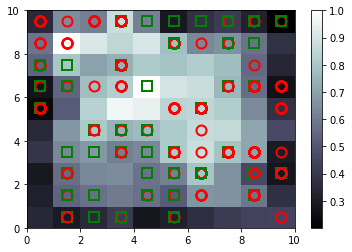

In [24]:
pcolor(som.distance_map().T)
colorbar() #gives legend

markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()


In [23]:
### Markers to distinguish frauds
### Red are Class 0
### Green are Class 1
### i is the index and x is the vector of each customer
### for each x get the winning node first
### co-ordinates of the winning node are w[0] and w[1], 0.5 is added to center the marker
### s is a square
### marker face color is the inside color of the marker

In [45]:
mappings = som.win_map(X)
mappings.keys()

dict_keys([(3, 6), (6, 5), (2, 9), (1, 2), (5, 0), (3, 3), (8, 2), (4, 3), (8, 3), (8, 9), (7, 9), (9, 9), (8, 6), (9, 2), (3, 0), (0, 7), (5, 8), (2, 0), (3, 9), (7, 8), (9, 0), (6, 1), (0, 5), (3, 7), (6, 2), (5, 5), (2, 3), (9, 5), (1, 6), (9, 6), (4, 4), (4, 2), (5, 3), (4, 1), (0, 9), (8, 1), (9, 3), (8, 7), (5, 1), (6, 4), (3, 4), (5, 2), (0, 8), (2, 4), (1, 3), (1, 8), (7, 3), (6, 8), (1, 1), (0, 6), (1, 9), (6, 9), (7, 6), (4, 9), (1, 0), (8, 8), (1, 7), (5, 9), (4, 6), (6, 3), (2, 1), (2, 6)])

In [46]:
mappings[(3,6)] #these are the inputs for the winning node 3,6

[array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
        0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.05      , 0.01212   ]),
 array([0.72114172, 1.        , 0.15533835, 0.32142857, 0.5       ,
        0.38461538, 0.375     , 0.00877193, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.        , 0.        ]),
 array([0.89100585, 1.        , 0.09398496, 0.39446429, 0.5       ,
        0.53846154, 0.375     , 0.07017544, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.068     , 0.        ]),
 array([0.7976967 , 1.        , 0.13157895, 0.41071429, 0.        ,
        0.46153846, 0.375     , 0.05263158, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.        , 0.04      ]),
 array([0.7562758 , 1.        , 0.2756391 , 0.14285714, 0.        ,
        0.92307692, 0.375     , 0.05263158, 0.        , 0.        ,
        0.        , 1.        , 0.5     

In [47]:
frauds = np.concatenate((mappings[(1,8)], mappings[(4,6)]), axis = 0)
#concat the fraud winning nodes by seeing the graph

In [48]:
frauds

array([[6.02124703e-01, 0.00000000e+00, 1.27819549e-01, 4.46428571e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.14035088e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       [9.20249551e-01, 0.00000000e+00, 4.28571429e-01, 6.25000000e-02,
        0.00000000e+00, 5.38461538e-01, 3.75000000e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e-01, 7.50000000e-02, 1.00000000e-05],
       [7.47330106e-01, 0.00000000e+00, 1.10225564e-01, 1.78571429e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
       [1.82978349e-01, 0.00000000e+00, 1.47819549e-01, 2.08928571e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.38596491e-03,
        0.00000000e+00, 0.00000000e+0

In [49]:
# these are two list of customers
frauds1 = sc.inverse_transform(frauds)

In [50]:
frauds1

array([[1.5716082e+07, 0.0000000e+00, 2.2250000e+01, 1.2500000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 3.2500000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.8000000e+02, 1.0000000e+00],
       [1.5795527e+07, 0.0000000e+00, 4.2250000e+01, 1.7500000e+00,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.5000000e+02, 2.0000000e+00],
       [1.5752344e+07, 0.0000000e+00, 2.1080000e+01, 5.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5611409e+07, 0.0000000e+00, 2.3580000e+01, 5.8500000e-01,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.2500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [51]:
### ids are first coloumn * 10^7